<a href="https://colab.research.google.com/github/Tejasri-D/sparksinternship/blob/main/TSF_TASK_1_Tejas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION** #TSF #GRIPSEPT22
**Data Science and Business Analytics Internship**

# **Author : Tejasri D**
# **TASK 1: Prediction Using Supervised Machine Learning**
Problem Statement : Predict the percentage of a student based on the number of hours studied

# **Importing Libraries**

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import statsmodels.formula.api as smf 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

#To ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# **LOADING DATASET**

In [2]:
#Reading Data from remote link
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Describing The Data**

In [3]:
#To find the number of rows and columns
print(df.shape)

(25, 2)


In [4]:
#To find the data type
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
#To find the more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#To find the descriptive statistics of dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Now we will check the null values in dataset 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Visualizing The Data**

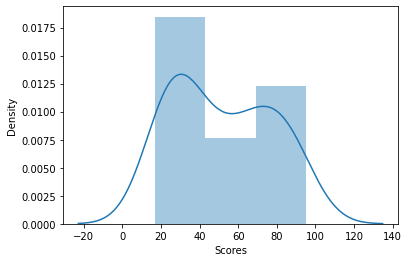

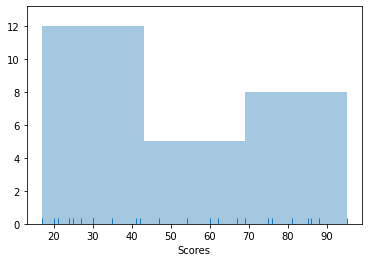

In [8]:
#Plotting the dataset 
sns.distplot(df["Scores"])
plt.show()


sns.distplot(df["Scores"], kde=False,rug=True)
plt.show()

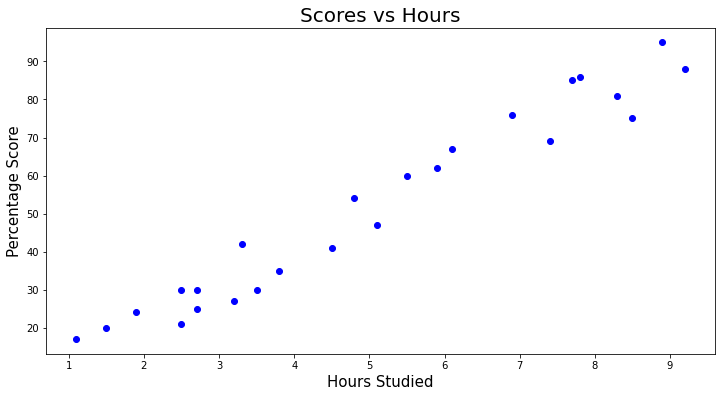

In [9]:
# Plotting the distribution of score
plt.figure(figsize=(12,6))
plt.title('Scores vs Hours',size=20)  
plt.xlabel('Hours Studied',size=15)  
plt.ylabel('Percentage Score',size=15) 
plt.scatter(df.Hours,df.Scores,color='blue')
plt.show()

In [10]:
#To determine the correlation between two variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **Preparing The Data**

In [11]:
#Dividing the data into "attributes"(inputs) and "labels"(outputs).Using the iloc function we will divide the data.
x=df.iloc[:, :-1].values
y=df.iloc[:,1].values

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# **Splitting Dataset Into Train and Test**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# **Model Preparation Using Linear Regression**

In [15]:
regressor=LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)
print("Training of the model is complete")

Training of the model is complete


# **Plotting Linear Regression Model**

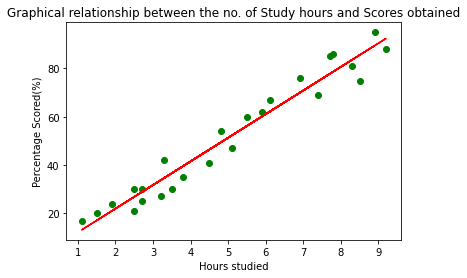

In [16]:
#Plotting the regression line 
line=regressor.coef_*x+regressor.intercept_

#Plotting the scatter plot with the regression line 
plt.scatter(x,y,color='green',marker='o')
plt.plot(x,line,color='red');
plt.title('Graphical relationship between the no. of Study hours and Scores obtained')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored(%)')
plt.show()

In [17]:
print('intercept={}, slope coefficient={}'.format(regressor.intercept_,regressor.coef_))

intercept=2.3708153823418883, slope coefficient=[9.78856669]


# **Predicting Labels Using Linear Regression Model**

In [18]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


# **Comparing Actual and Predicted Results**

In [19]:
data=pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [20]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
R2: 0.9568211104435257


# **Testing The Model With Our Own Data**

In [21]:
hours =9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=regressor.predict(test)
print("No of hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No of hours=9.25
Predicted Score=92.91505723477056


**Therefore, from the above results it can be concluded that the predicted score of a person studying for 9.25 hours is 92.915**